In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier
from sklearn import metrics
import pickle
import warnings
warnings.filterwarnings('ignore')

In [2]:
train = pd.read_csv('train.csv')

In [3]:
test = pd.read_csv('test.csv')

In [4]:
train.head()

,id,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [5]:
test.head()

,id,comment_text
0,00001cee341fdb12,Yo bitch Ja Rule is more succesful then you'll...
1,0000247867823ef7,== From RfC == \n\n The title is fine as it is...
2,00013b17ad220c46,""" \n\n == Sources == \n\n * Zawe Ashton on Lap..."
3,00017563c3f7919a,":If you have a look back at the source, the in..."
4,00017695ad8997eb,I don't anonymously edit articles at all.


In [6]:
train.shape

(159571, 8)

In [7]:
train.describe()

,malignant,highly_malignant,rude,threat,abuse,loathe
count,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000
mean,0.095844,0.009996,0.052948,0.002996,0.049364,0.008805
std,0.294379,0.099477,0.223931,0.054650,0.216627,0.093420
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [8]:
train.isnull().sum()

id                  0
comment_text        0
malignant           0
highly_malignant    0
rude                0
threat              0
abuse               0
loathe              0
dtype: int64

In [9]:
train['Threat_level'] = 0

In [10]:
train.head()

,id,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe,Threat_level
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0,0


In [11]:
train.loc[((train['malignant']== 1) & (train['highly_malignant']== 1) & (train['rude']== 1) & (train['threat']== 1) & (train['abuse']== 1) & (train['loathe']== 1)), 'Threat_level']= 6

In [12]:
train.loc[((train['malignant']== 1) & (train['highly_malignant']== 1) & (train['rude']== 1) & (train['threat']== 1) & (train['abuse']== 1) & (train['loathe']== 0)), 'Threat_level']= 5
train.loc[((train['malignant']== 1) & (train['highly_malignant']== 1) & (train['rude']== 1) & (train['threat']== 1) & (train['abuse']== 0) & (train['loathe']== 1)), 'Threat_level']= 5
train.loc[((train['malignant']== 1) & (train['highly_malignant']== 1) & (train['rude']== 1) & (train['threat']== 0) & (train['abuse']== 1) & (train['loathe']== 1)), 'Threat_level']= 5
train.loc[((train['malignant']== 1) & (train['highly_malignant']== 1) & (train['rude']== 0) & (train['threat']== 1) & (train['abuse']== 1) & (train['loathe']== 1)), 'Threat_level']= 5
train.loc[((train['malignant']== 1) & (train['highly_malignant']== 0) & (train['rude']== 1) & (train['threat']== 1) & (train['abuse']== 1) & (train['loathe']== 1)), 'Threat_level']= 5
train.loc[((train['malignant']== 0) & (train['highly_malignant']== 1) & (train['rude']== 1) & (train['threat']== 1) & (train['abuse']== 1) & (train['loathe']== 1)), 'Threat_level']= 5

In [13]:
train.loc[((train['malignant']== 1) & (train['highly_malignant']== 1) & (train['rude']== 1) & (train['threat']== 1) & (train['abuse']== 0) & (train['loathe']== 0)), 'Threat_level']= 4
train.loc[((train['malignant']== 1) & (train['highly_malignant']== 1) & (train['rude']== 1) & (train['threat']== 0) & (train['abuse']== 1) & (train['loathe']== 0)), 'Threat_level']= 4
train.loc[((train['malignant']== 1) & (train['highly_malignant']== 1) & (train['rude']== 0) & (train['threat']== 1) & (train['abuse']== 1) & (train['loathe']== 0)), 'Threat_level']= 4
train.loc[((train['malignant']== 1) & (train['highly_malignant']== 0) & (train['rude']== 1) & (train['threat']== 1) & (train['abuse']== 1) & (train['loathe']== 0)), 'Threat_level']= 4
train.loc[((train['malignant']== 0) & (train['highly_malignant']== 1) & (train['rude']== 1) & (train['threat']== 1) & (train['abuse']== 1) & (train['loathe']== 0)), 'Threat_level']= 4

In [14]:
train.loc[((train['malignant']== 1) & (train['highly_malignant']== 1) & (train['rude']== 1) & (train['threat']== 0) & (train['abuse']== 0) & (train['loathe']== 1)), 'Threat_level']= 4
train.loc[((train['malignant']== 1) & (train['highly_malignant']== 1) & (train['rude']== 0) & (train['threat']== 1) & (train['abuse']== 0) & (train['loathe']== 1)), 'Threat_level']= 4
train.loc[((train['malignant']== 1) & (train['highly_malignant']== 0) & (train['rude']== 1) & (train['threat']== 1) & (train['abuse']== 0) & (train['loathe']== 1)), 'Threat_level']= 4
train.loc[((train['malignant']== 0) & (train['highly_malignant']== 1) & (train['rude']== 1) & (train['threat']== 1) & (train['abuse']== 0) & (train['loathe']== 1)), 'Threat_level']= 4

In [15]:
train.loc[((train['malignant']== 1) & (train['highly_malignant']== 1) & (train['rude']== 0) & (train['threat']== 0) & (train['abuse']== 1) & (train['loathe']== 1)), 'Threat_level']= 4
train.loc[((train['malignant']== 1) & (train['highly_malignant']== 0) & (train['rude']== 1) & (train['threat']== 0) & (train['abuse']== 1) & (train['loathe']== 1)), 'Threat_level']= 4
train.loc[((train['malignant']== 0) & (train['highly_malignant']== 1) & (train['rude']== 1) & (train['threat']== 0) & (train['abuse']== 1) & (train['loathe']== 1)), 'Threat_level']= 4

In [16]:
train.loc[((train['malignant']== 1) & (train['highly_malignant']== 0) & (train['rude']== 0) & (train['threat']== 1) & (train['abuse']== 1) & (train['loathe']== 1)), 'Threat_level']= 4
train.loc[((train['malignant']== 0) & (train['highly_malignant']== 1) & (train['rude']== 0) & (train['threat']== 1) & (train['abuse']== 1) & (train['loathe']== 1)), 'Threat_level']= 4

In [17]:
train.loc[((train['malignant']== 0) & (train['highly_malignant']== 0) & (train['rude']== 1) & (train['threat']== 1) & (train['abuse']== 1) & (train['loathe']== 1)), 'Threat_level']= 4

In [18]:
train.loc[((train['malignant']== 1) & (train['highly_malignant']== 1) & (train['rude']== 1) & (train['threat']== 0) & (train['abuse']== 0) & (train['loathe']== 0)), 'Threat_level']= 3
train.loc[((train['malignant']== 1) & (train['highly_malignant']== 1) & (train['rude']== 0) & (train['threat']== 1) & (train['abuse']== 0) & (train['loathe']== 0)), 'Threat_level']= 3
train.loc[((train['malignant']== 1) & (train['highly_malignant']== 0) & (train['rude']== 1) & (train['threat']== 1) & (train['abuse']== 0) & (train['loathe']== 0)), 'Threat_level']= 3
train.loc[((train['malignant']== 0) & (train['highly_malignant']== 1) & (train['rude']== 1) & (train['threat']== 0) & (train['abuse']== 0) & (train['loathe']== 0)), 'Threat_level']= 3

In [19]:
train.loc[((train['malignant']== 1) & (train['highly_malignant']== 1) & (train['rude']== 0) & (train['threat']== 0) & (train['abuse']== 0) & (train['loathe']== 1)), 'Threat_level']= 3
train.loc[((train['malignant']== 1) & (train['highly_malignant']== 0) & (train['rude']== 1) & (train['threat']== 0) & (train['abuse']== 0) & (train['loathe']== 1)), 'Threat_level']= 3
train.loc[((train['malignant']== 0) & (train['highly_malignant']== 1) & (train['rude']== 1) & (train['threat']== 0) & (train['abuse']== 0) & (train['loathe']== 1)), 'Threat_level']= 3

In [20]:
train.loc[((train['malignant']== 1) & (train['highly_malignant']== 0) & (train['rude']== 0) & (train['threat']== 0) & (train['abuse']== 1) & (train['loathe']== 1)), 'Threat_level']= 3
train.loc[((train['malignant']== 0) & (train['highly_malignant']== 1) & (train['rude']== 0) & (train['threat']== 0) & (train['abuse']== 1) & (train['loathe']== 1)), 'Threat_level']= 3

In [21]:
train.loc[((train['malignant']== 0) & (train['highly_malignant']== 0) & (train['rude']== 0) & (train['threat']== 1) & (train['abuse']== 1) & (train['loathe']== 1)), 'Threat_level']= 3

In [22]:
train.loc[((train['malignant']== 0) & (train['highly_malignant']== 0) & (train['rude']== 0) & (train['threat']== 0) & (train['abuse']== 1) & (train['loathe']== 1)), 'Threat_level']= 2
train.loc[((train['malignant']== 0) & (train['highly_malignant']== 0) & (train['rude']== 0) & (train['threat']== 1) & (train['abuse']== 0) & (train['loathe']== 1)), 'Threat_level']= 2
train.loc[((train['malignant']== 0) & (train['highly_malignant']== 0) & (train['rude']== 1) & (train['threat']== 0) & (train['abuse']== 0) & (train['loathe']== 1)), 'Threat_level']= 2
train.loc[((train['malignant']== 0) & (train['highly_malignant']== 1) & (train['rude']== 0) & (train['threat']== 0) & (train['abuse']== 0) & (train['loathe']== 1)), 'Threat_level']= 2
train.loc[((train['malignant']== 1) & (train['highly_malignant']== 0) & (train['rude']== 0) & (train['threat']== 0) & (train['abuse']== 0) & (train['loathe']== 1)), 'Threat_level']= 2

In [23]:
train.loc[((train['malignant']== 0) & (train['highly_malignant']== 0) & (train['rude']== 0) & (train['threat']== 1) & (train['abuse']== 1) & (train['loathe']== 0)), 'Threat_level']= 2
train.loc[((train['malignant']== 0) & (train['highly_malignant']== 0) & (train['rude']== 1) & (train['threat']== 0) & (train['abuse']== 1) & (train['loathe']== 0)), 'Threat_level']= 2
train.loc[((train['malignant']== 0) & (train['highly_malignant']== 1) & (train['rude']== 0) & (train['threat']== 0) & (train['abuse']== 1) & (train['loathe']== 0)), 'Threat_level']= 2
train.loc[((train['malignant']== 1) & (train['highly_malignant']== 0) & (train['rude']== 0) & (train['threat']== 0) & (train['abuse']== 1) & (train['loathe']== 0)), 'Threat_level']= 2

In [24]:
train.loc[((train['malignant']== 0) & (train['highly_malignant']== 0) & (train['rude']== 1) & (train['threat']== 1) & (train['abuse']== 0) & (train['loathe']== 0)), 'Threat_level']= 2
train.loc[((train['malignant']== 0) & (train['highly_malignant']== 1) & (train['rude']== 0) & (train['threat']== 1) & (train['abuse']== 0) & (train['loathe']== 0)), 'Threat_level']= 2
train.loc[((train['malignant']== 1) & (train['highly_malignant']== 0) & (train['rude']== 0) & (train['threat']== 1) & (train['abuse']== 0) & (train['loathe']== 0)), 'Threat_level']= 2

In [25]:
train.loc[((train['malignant']== 0) & (train['highly_malignant']== 1) & (train['rude']== 1) & (train['threat']== 0) & (train['abuse']== 0) & (train['loathe']== 0)), 'Threat_level']= 2
train.loc[((train['malignant']== 1) & (train['highly_malignant']== 0) & (train['rude']== 1) & (train['threat']== 0) & (train['abuse']== 0) & (train['loathe']== 0)), 'Threat_level']= 2

In [26]:
train.loc[((train['malignant']== 1) & (train['highly_malignant']== 1) & (train['rude']== 0) & (train['threat']== 0) & (train['abuse']== 0) & (train['loathe']== 0)), 'Threat_level']= 2

In [27]:
train.loc[((train['malignant']== 0) & (train['highly_malignant']== 0) & (train['rude']== 0) & (train['threat']== 0) & (train['abuse']== 0) & (train['loathe']== 1)), 'Threat_level']= 1
train.loc[((train['malignant']== 0) & (train['highly_malignant']== 0) & (train['rude']== 0) & (train['threat']== 0) & (train['abuse']== 1) & (train['loathe']== 0)), 'Threat_level']= 1
train.loc[((train['malignant']== 0) & (train['highly_malignant']== 0) & (train['rude']== 0) & (train['threat']== 1) & (train['abuse']== 0) & (train['loathe']== 0)), 'Threat_level']= 1
train.loc[((train['malignant']== 0) & (train['highly_malignant']== 0) & (train['rude']== 1) & (train['threat']== 0) & (train['abuse']== 0) & (train['loathe']== 0)), 'Threat_level']= 1
train.loc[((train['malignant']== 0) & (train['highly_malignant']== 1) & (train['rude']== 0) & (train['threat']== 0) & (train['abuse']== 0) & (train['loathe']== 0)), 'Threat_level']= 1
train.loc[((train['malignant']== 1) & (train['highly_malignant']== 0) & (train['rude']== 0) & (train['threat']== 0) & (train['abuse']== 0) & (train['loathe']== 0)), 'Threat_level']= 1

In [28]:
train.columns

Index(['id', 'comment_text', 'malignant', 'highly_malignant', 'rude', 'threat',
       'abuse', 'loathe', 'Threat_level'],
      dtype='object')

In [29]:
train.drop(['malignant','highly_malignant','rude','threat','abuse','loathe'], axis= 1, inplace= True)

#### EDA

1. id

In [30]:
train['id'].unique()

array(['0000997932d777bf', '000103f0d9cfb60f', '000113f07ec002fd', ...,
       'ffee36eab5c267c9', 'fff125370e4aaaf3', 'fff46fc426af1f9a'],
      dtype=object)

In [31]:
a = []
for i in train['id']:
    i = i[-1]
    a.append(i)

In [32]:
train['id'] = pd.Series(a)

In [33]:
train['id'].unique()

array(['f', 'd', 'e', '5', '7', '1', 'a', 'c', '4', 'b', '9', '3', '6',
       '2', '0', '8'], dtype=object)

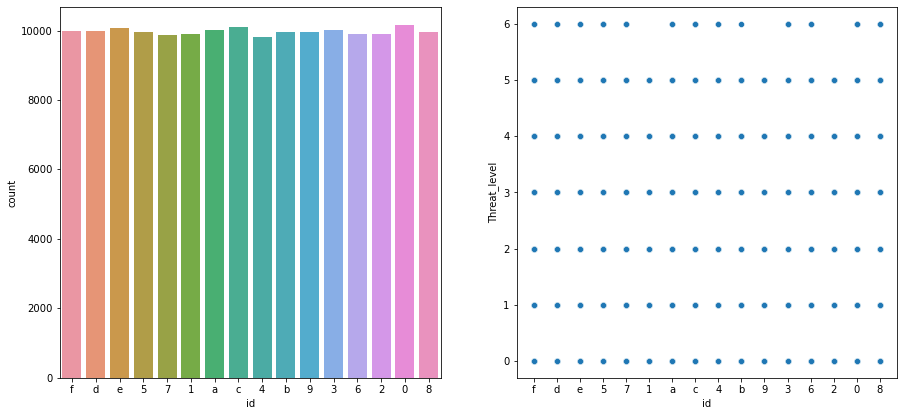

In [34]:
plt.figure(figsize= [15,15])
plt.subplot(221)
sns.countplot(train['id'])
plt.xlabel('id')
plt.subplot(222)
sns.scatterplot(x= 'id', y= 'Threat_level', data= train)
plt.xlabel('id')
plt.ylabel('Threat_level')
plt.show()

2. comment_text

In [34]:
train['comment_text'].unique()

array(["Explanation\nWhy the edits made under my username Hardcore Metallica Fan were reverted? They weren't vandalisms, just closure on some GAs after I voted at New York Dolls FAC. And please don't remove the template from the talk page since I'm retired now.89.205.38.27",
       "D'aww! He matches this background colour I'm seemingly stuck with. Thanks.  (talk) 21:51, January 11, 2016 (UTC)",
       "Hey man, I'm really not trying to edit war. It's just that this guy is constantly removing relevant information and talking to me through edits instead of my talk page. He seems to care more about the formatting than the actual info.",
       ...,
       'Spitzer \n\nUmm, theres no actual article for prostitution ring.  - Crunch Captain.',
       'And it looks like it was actually you who put on the speedy to have the first version deleted now that I look at it.',
       '"\nAnd ... I really don\'t think you understand.  I came here and my idea was bad right away.  What kind of communit

In [35]:
a = []
for i in train['comment_text']:
    i = i[-1]
    a.append(i)

In [37]:
train['comment_text'] = pd.Series(a)

In [38]:
train['comment_text'].unique()

array(['7', ')', '.', '"', '?', 'K', '9', 'w', ',', 'i', '-', '!', ']',
       '2', 'u', 'n', 's', 'y', 'm', 'd', 'c', 'e', '4', '5', 'k', '6',
       '3', 't', 'g', "'", ':', 'o', '0', 'a', '8', 'x', 'r', 'C', '=',
       '`', 'G', 'T', '1', '+', '@', 'R', '/', 'f', 'h', '~', '☎', '—',
       'D', '♥', 'p', 'S', '(', ';', '–', 'F', 'V', 'l', 'ン', 'I', 'U',
       'P', 'M', '☺', '}', 'b', '>', 'ג', 'A', 'Ⓣ', 'Y', 'J', 'B', 'E',
       'L', '^', '\u2060', '™', '✉', 'O', '→', '*', '_', 'X', 'v', 'á',
       'z', '©', '−', '🗽', '\u200b', 'т', 'N', '|', '[', '♫', '{', '•',
       '”', 'j', '੭', '%', '」', 'H', 'φ', '∞', 'W', '…', '\x97', '。', '$',
       '✎', '\\', '·', '»', '♚', 'দ', 'Z', '😂', '☼', '─', '§', 'ʙ', '↓',
       '♠', '✈', '😄', '∆', 'æ', '✍', '£', 'म', '¦', '☯', 'ツ', '）', '<',
       '¡', '÷', '母', 'q', '♔', '³', '’', '好', '┐', 'ʼ', 'ν', '✰', '€',
       '✆', 'Ü', '�', '\u200e', '×', 'ॐ', 'Q', '«', 'ل', '☑', 'ி', '༆',
       '#', '¶', '☄', '¢', '⇔', 'Φ', '☃', '⚔', '水', '☭', '₩'

In [39]:
train['comment_text'] = train['comment_text'].replace(['7', ')', '.', '"', '?', '9', ',', '-', '!', ']',
                                                       '2', '4', '5', '6','3', "'", ':', '0', '8', '=',
                                                       '`', '1', '+', '@', 'R', '/', '~', '☎', '—', '♥', '(', ';', '–', 'ン',
                                                       '☺', '}', '>', 'ג', 'Ⓣ', '^', '\u2060', '™', '✉', '→', '*', '_', 'á',
                                                       '©', '−', '🗽', '\u200b', 'т', '|', '[', '♫', '{', '•',
                                                       '”', '੭', '%', '」', 'φ', '∞', '…', '\x97', '。', '$',
                                                       '✎', '\\', '·', '»', '♚', 'দ', '😂', '☼', '─', '§', 'ʙ', '↓',
                                                       '♠', '✈', '😄', '∆', 'æ', '✍', '£', 'म', '¦', '☯', 'ツ', '）', '<',
                                                       '¡', '÷', '母', '♔', '³', '’', '好', '┐', 'ʼ', 'ν', '✰', '€',
                                                       '✆', 'Ü', '�', '\u200e', '×', 'ॐ', '«', 'ل', '☑', 'ி', '༆',
                                                       '#', '¶', '☄', '¢', '⇔', 'Φ', '☃', '⚔', '水', '☭', '₩', 'έ', '❞',
                                                       '←', 'თ', 'а', '≈', '○', '♦', 'थ', '¨', 'ך', '≠', 'Θ', 'Ǔ', '☿',
                                                       '話', 'к', '†', '】', '✐', 'ב', 'ć', 'ᴷ', '∅', '╩', '💜', 'ה', 'ʕ',
                                                       'ک', '―', 'É', '்', 'ń', '◔', '⟲', 'χ', '®', '市', 'ɟ', '┛', 'é',
                                                       'ط', '▶', '★', '！', '你', '⁾'],
                                                      [np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan,
                                                       np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan,
                                                       np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan,
                                                       np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan,
                                                       np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan,
                                                       np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan,
                                                       np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan,
                                                       np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan,
                                                       np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan,
                                                       np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan,
                                                       np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan,
                                                       np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan,
                                                       np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan,
                                                       np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan,
                                                       np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan,
                                                       np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan,
                                                       np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan,
                                                       np.nan, np.nan, np.nan])

In [40]:
train['comment_text'].isnull().sum()

137061

In [41]:
train['comment_text'] = train['comment_text'].fillna(method= 'bfill')
train['comment_text'] = train['comment_text'].fillna(method= 'ffill')

In [42]:
train['comment_text'].unique()

array(['K', 'w', 'i', 'u', 'n', 's', 'y', 'm', 'd', 'c', 'e', 'k', 't',
       'g', 'o', 'a', 'x', 'r', 'C', 'G', 'T', 'f', 'h', 'D', 'p', 'S',
       'F', 'V', 'l', 'I', 'U', 'P', 'M', 'b', 'A', 'Y', 'J', 'B', 'E',
       'L', 'O', 'X', 'v', 'z', 'N', 'j', 'H', 'W', 'Z', 'q', 'Q'],
      dtype=object)

In [43]:
train['comment_text'] = train['comment_text'].str.lower()

In [44]:
train['comment_text'].unique()

array(['k', 'w', 'i', 'u', 'n', 's', 'y', 'm', 'd', 'c', 'e', 't', 'g',
       'o', 'a', 'x', 'r', 'f', 'h', 'p', 'v', 'l', 'b', 'j', 'z', 'q'],
      dtype=object)

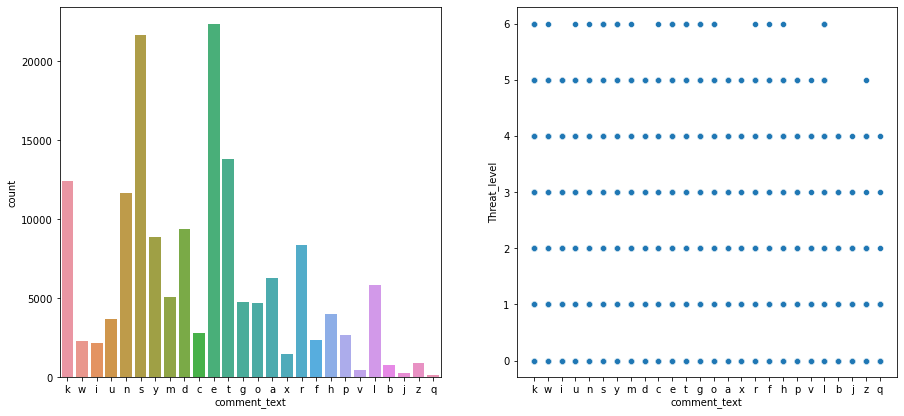

In [45]:
plt.figure(figsize= [15,15])
plt.subplot(221)
sns.countplot(train['comment_text'])
plt.xlabel('comment_text')
plt.subplot(222)
sns.scatterplot(x= 'comment_text', y= 'Threat_level', data= train)
plt.xlabel('comment_text')
plt.ylabel('Threat_level')
plt.show()

In [46]:
train['id'].unique()

array(['f', 'd', 'e', '5', '7', '1', 'a', 'c', '4', 'b', '9', '3', '6',
       '2', '0', '8'], dtype=object)

In [47]:
train['id'] = train['id'].replace(['f', 'd', 'e', '5', '7', '1', 'a', 'c', '4', 'b', '9', '3', '6', '2', '0', '8'],
                                  np.arange(0,16))

In [48]:
train['comment_text'].unique()

array(['k', 'w', 'i', 'u', 'n', 's', 'y', 'm', 'd', 'c', 'e', 't', 'g',
       'o', 'a', 'x', 'r', 'f', 'h', 'p', 'v', 'l', 'b', 'j', 'z', 'q'],
      dtype=object)

In [49]:
train['comment_text'] = train['comment_text'].replace(['k', 'w', 'i', 'u', 'n', 's', 'y', 'm', 'd', 'c', 'e', 't', 'g',
                                                       'o', 'a', 'x', 'r', 'f', 'h', 'p', 'v', 'l', 'b', 'j', 'z', 'q'],
                                                      np.arange(0,26))

In [50]:
X = train.drop(['Threat_level'], axis= 1)
y = train['Threat_level']

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.25, random_state= 1)

In [52]:
scaler = StandardScaler()

In [53]:
scaledX_train = scaler.fit_transform(X_train)
scaledX_test = scaler.transform(X_test)

In [54]:
lr = LogisticRegression()
lrf = GridSearchCV(lr, param_grid= {'C': [1,2,3,4,5]}, scoring= 'accuracy', cv= 5)

In [55]:
lrf.fit(scaledX_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [1, 2, 3, 4, 5]}, scoring='accuracy')

In [56]:
lrf.best_params_

{'C': 1}

In [57]:
print('train score : ', lrf.score(scaledX_train, y_train))
print('test score : ', lrf.score(scaledX_test, y_test))

train score :  0.9230602115677067
test score :  0.9207881081894067


In [58]:
dt = DecisionTreeClassifier(criterion= 'entropy')
par = {'max_depth' : [1,2,3,4,5], 'min_samples_leaf': [1,2,3,4,5], 'min_samples_split': [1,2,3,4,5]}
dtf = GridSearchCV(dt, param_grid= par, scoring= 'accuracy', cv= 5)

In [59]:
dtf.fit(scaledX_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(criterion='entropy'),
             param_grid={'max_depth': [1, 2, 3, 4, 5],
                         'min_samples_leaf': [1, 2, 3, 4, 5],
                         'min_samples_split': [1, 2, 3, 4, 5]},
             scoring='accuracy')

In [60]:
dtf.best_params_

{'max_depth': 1, 'min_samples_leaf': 1, 'min_samples_split': 2}

In [61]:
print('train score : ', dtf.score(scaledX_train, y_train))
print('test score : ', dtf.score(scaledX_test, y_test))

train score :  0.9230602115677067
test score :  0.9207881081894067


In [62]:
rf = RandomForestClassifier(criterion= 'entropy')
rff = GridSearchCV(rf, param_grid= par, scoring= 'accuracy', cv= 5)

In [63]:
rff.fit(scaledX_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(criterion='entropy'),
             param_grid={'max_depth': [1, 2, 3, 4, 5],
                         'min_samples_leaf': [1, 2, 3, 4, 5],
                         'min_samples_split': [1, 2, 3, 4, 5]},
             scoring='accuracy')

In [64]:
rff.best_params_

{'max_depth': 1, 'min_samples_leaf': 1, 'min_samples_split': 2}

In [65]:
print('train score : ', rff.score(scaledX_train, y_train))
print('test score : ', rff.score(scaledX_test, y_test))

train score :  0.9230602115677067
test score :  0.9207881081894067


In [66]:
bc = BaggingClassifier(base_estimator= DecisionTreeClassifier(criterion= 'entropy'))
bcf = GridSearchCV(bc, param_grid= {'max_samples': [1,2,3,4,5], 'max_features': [1,2,3,4,5]}, scoring= 'accuracy', cv= 5)

In [67]:
bcf.fit(scaledX_train, y_train)

GridSearchCV(cv=5,
             estimator=BaggingClassifier(base_estimator=DecisionTreeClassifier(criterion='entropy')),
             param_grid={'max_features': [1, 2, 3, 4, 5],
                         'max_samples': [1, 2, 3, 4, 5]},
             scoring='accuracy')

In [68]:
bcf.best_params_

{'max_features': 1, 'max_samples': 1}

In [69]:
print('train score : ', bcf.score(scaledX_train, y_train))
print('test score : ', bcf.score(scaledX_test, y_test))

train score :  0.9230602115677067
test score :  0.9207881081894067


In [70]:
ad = AdaBoostClassifier(base_estimator= DecisionTreeClassifier(criterion= 'entropy'))
adf = GridSearchCV(ad, param_grid= {'n_estimators': [40, 42, 45, 32, 25], 'learning_rate': [1, 0.1, 0.01, 0.5, 0.6789]},
                   scoring= 'accuracy', cv= 5)

In [71]:
adf.fit(scaledX_train, y_train)

GridSearchCV(cv=5,
             estimator=AdaBoostClassifier(base_estimator=DecisionTreeClassifier(criterion='entropy')),
             param_grid={'learning_rate': [1, 0.1, 0.01, 0.5, 0.6789],
                         'n_estimators': [40, 42, 45, 32, 25]},
             scoring='accuracy')

In [72]:
adf.best_params_

{'learning_rate': 0.1, 'n_estimators': 40}

In [73]:
print('train score : ', adf.score(scaledX_train, y_train))
print('test score : ', adf.score(scaledX_test, y_test))

train score :  0.9230602115677067
test score :  0.9207881081894067


In [76]:
test.head()

,id,comment_text
0,00001cee341fdb12,Yo bitch Ja Rule is more succesful then you'll...
1,0000247867823ef7,== From RfC == \n\n The title is fine as it is...
2,00013b17ad220c46,""" \n\n == Sources == \n\n * Zawe Ashton on Lap..."
3,00017563c3f7919a,":If you have a look back at the source, the in..."
4,00017695ad8997eb,I don't anonymously edit articles at all.


In [77]:
test['id'].unique()

array(['00001cee341fdb12', '0000247867823ef7', '00013b17ad220c46', ...,
       'fffda9e8d6fafa9e', 'fffe8f1340a79fc2', 'ffffce3fb183ee80'],
      dtype=object)

In [78]:
a = []
for i in test['id']:
    i = i[-1]
    a.append(i)

In [79]:
test['id'] = pd.Series(a)

In [80]:
test['id'].unique()

array(['2', '7', '6', 'a', 'b', 'f', '1', '8', 'c', '9', '3', '0', '5',
       '4', 'd', 'e'], dtype=object)

In [81]:
test['comment_text'].unique()

array(["Yo bitch Ja Rule is more succesful then you'll ever be whats up with you and hating you sad mofuckas...i should bitch slap ur pethedic white faces and get you to kiss my ass you guys sicken me. Ja rule is about pride in da music man. dont diss that shit on him. and nothin is wrong bein like tupac he was a brother too...fuckin white boys get things right next time.,",
       '== From RfC == \n\n The title is fine as it is, IMO.',
       '" \n\n == Sources == \n\n * Zawe Ashton on Lapland —  /  "', ...,
       '" \n\n == Okinotorishima categories == \n\n I see your changes and agree this is ""more correct.""  I had gotten confused, but then found this: \n :... while acknowledging Japan\'s territorial rights to Okinotorishima itself ... \n However, is there a category for  \n :... did not acknowledge Japan\'s claim to an exclusive economic zone (EEZ) stemming from Okinotorishima. \n That is, is there a category for ""disputed EEZ""s?   "',
       '" \n\n == ""One of the founding n

In [82]:
a = []
for i in test['comment_text']:
    i = i[-1]
    a.append(i)

In [83]:
test['comment_text'] = pd.Series(a)

In [85]:
test['comment_text'] = test['comment_text'].str.lower()

In [86]:
test['comment_text'].unique()

array([',', '.', '"', '-', 'd', '4', '?', '7', '|', 'm', 'a', 's', '!',
       '허', 'i', 'ú', '6', ')', 't', 'e', '*', '।', 'ا', 'y', 'h', 'k',
       'r', '=', '9', '1', 'o', 'n', '0', '$', "'", 'g', '/', '·', 'c',
       ':', '2', '8', '>', ']', 'z', '—', '}', '🗽', 'f', '5', '…', 'x',
       'v', 'p', 'u', 'w', 'l', '~', 'د', '\xa0', '•', '\u200d', '。', 'ử',
       '3', 'j', 'ٰ', '(', ';', 'ة', '讀', 'ت', 'ع', 'ن', '–', '\\', 'b',
       'ม', '%', 'כ', '←', 'ب', '≠', '→', '۔', '_', 'đ', '@', '२', '^',
       'র', 'ë', '♥', '∞', '÷', 'é', '<', '{', '卐', '[', 'č', '까',
       '\u200e', 'न', 'î', 'ي', '+', '”', 'ς', '்', 'ظ', '#', '☺', 'ð',
       '͋', 'म', '😂', '`', '⋅', '།', '■', 'आ', 'ว', '，', 'س', 'ा', 'н',
       '司', '天', 'ك', 'ε', 'ξ', '∴', 'q', '°', 'ᡝ', 'ه', 'ر', 'в', '¦',
       '៕', 'ｄ', '☯', 'à', 'ተ', 'ो', 'ส', 'ß', 'ˉ', 'จ', 'م', 'ง', 'ی',
       'ა', '😵', '►', '원', 'ן', 'ה', '！', '−', '॥', '―', 'ল', '×', 'ố',
       '야', '녕', '್', 'α', '♬', 'े', '؟', '്', 'ˑ', 'ل', 'ä', 'শ'

In [89]:
test['comment_text'] = test['comment_text'].replace([',', '.', '"', '-', '4', '?', '7', '|', '!','허', 'ú', '6', ')', '*', '।', 'ا',
                                                     '=', '9', '1', '0', '$', "'", '/', '·',':', '2', '8', '>', ']', '—', '}', '🗽', '5', '…',
                                                     '~', 'د', '\xa0', '•', '\u200d', '。', 'ử', '3', 'ٰ', '(', ';', 'ة', '讀', 'ت', 'ع', 'ن', '–', '\\',
                                                     'ม', '%', 'כ', '←', 'ب', '≠', '→', '۔', '_', 'đ', '@', '२', '^',
                                                     'র', 'ë', '♥', '∞', '÷', 'é', '<', '{', '卐', '[', 'č', '까',
                                                     '\u200e', 'न', 'î', 'ي', '+', '”', 'ς', '்', 'ظ', '#', '☺', 'ð',
                                                     '͋', 'म', '😂', '`', '⋅', '།', '■', 'आ', 'ว', '，', 'س', 'ा', 'н',
                                                     '司', '天', 'ك', 'ε', 'ξ', '∴', '°', 'ᡝ', 'ه', 'ر', 'в', '¦',
                                                     '៕', 'ｄ', '☯', 'à', 'ተ', 'ो', 'ส', 'ß', 'ˉ', 'จ', 'م', 'ง', 'ی',
                                                     'ა', '😵', '►', '원', 'ן', 'ה', '！', '−', '॥', '―', 'ল', '×', 'ố',
                                                     '야', '녕', '್', 'α', '♬', 'े', '؟', '്', 'ˑ', 'ل', 'ä', 'শ', 'ỽ',
                                                     '\u200b', 'ת', 'ೆ', 'ے', 'ĕ', 'ء', '┐', 'ṃ', 'ん', 'ㅠ', '᛭', 'ै',
                                                     '။', 'ز', 'я', '다', 'κ', 'ӈ', 'ĥ', '≈', '&', '∼', 'є', 'ŋ', '’',
                                                     '̪', 'ב', '勒', 'ش', 'ύ', 'ﮯ', 'व', '΄', 'ω', 'ँ', 'জ', 'ּ',
                                                     'ş', 'θ', '\u2009', '³', 'ण', '吀', 'र', '‼', 'უ', 'σ', 'א', '§',
                                                     'ى', 'έ', 'ά', 'й', 'ॐ', 'ા', 'ר', 'อ', '형', 'å', '⚟', 'ে', '？',
                                                     '¸', '\x95', 'お', '♫', '广', '区', '│', 'ᛟ', '©', '♠', 'ג', 'ツ', 'ි',
                                                     'ć', '‚', 'ე', '¡', '谢', '記', '\u2003', 'ם', 'ㄱ', 'ම', 'ო', '트',
                                                     '系', 'ﻳ', 'ক', 'è', '😓', '\u3000', 'š', 'ộ', '±', 'บ', 'ʒ', '♦',
                                                     '☮', 'и', '王', 'گ', 'ை', 'т', 'ი', '™', 'ج', 'એ', 'ಠ', 'น',
                                                     '≡', 'ﺓ', '者', 'ι', 'ā', '√', 'ｇ', '୧', '雄', '₵', 'വ', '끌', '◙',
                                                     'چ', '짠', 'ሲ', '¤', 'η', '↔', 'ν', '͟', '）', 'ी', '،', 'ா', 'ܐ',
                                                     'ṥ', '☻', 'ன', 'æ', 'ए', 'ō', 'स', '้', '四', 'ɥ', '들', 'ο', '›',
                                                     'า', '″', 'ს', '🔹', 'ल', '₡', '๑', 'ך', '̈', 'ح', 'щ', '¬', 'ก',
                                                     'ó', 'မ', '៙', 'ా', '⁄', 'ট', 'ə', 'ं', '\u200c', 'с', '˜', '₠',
                                                     '“', '̀', 'ứ', '▶', 'í', 'ও', 'ℤ', 'ق', '′', 'а', 'м', 'ら', 'ᾒ',
                                                     'ь', '上', '实', 'i̇', '이', 'স', '太', '́', 'ন', 'ે', 'း', 'ė', 'ĭ',
                                                     'ψ', 'ھ', 'ـ', '⊗', '†', '려', 'و', 'ш', '😠', 'ヒ', 'ह', 'ะ', 'ნ',
                                                     '교', 'त', 'љ', '闸', 'г', 'ً', '학', 'ρ', '人', 'ں', 'ய', 'ം', 'َ',
                                                     '積', 'ê', 'ɳ', '●', '्', '∭', '࿂', '®', '□', '»', '▫', 'á', '─',
                                                     '⇔', '化', '😅', 'ч'],
                                                     [np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan,
                                                      np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan,
                                                      np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan,
                                                      np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan,
                                                      np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan,
                                                      np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan,
                                                      np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan,
                                                      np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan,
                                                      np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan,
                                                      np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan,
                                                      np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan,
                                                      np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan,
                                                      np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan,
                                                      np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan,
                                                      np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan,
                                                      np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan,
                                                      np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan,
                                                      np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan,
                                                      np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan,
                                                      np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan])

In [90]:
test['comment_text'].isnull().sum()

128230

In [91]:
test['comment_text'] = test['comment_text'].fillna(method= 'bfill')
test['comment_text'] = test['comment_text'].fillna(method= 'ffill')

In [92]:
test['comment_text'].unique()

array(['d', 'm', 'a', 's', 'i', 't', 'e', 'y', 'h', 'k', 'r', 'o', 'n',
       'g', 'c', 'z', 'f', 'x', 'v', 'p', 'u', 'w', 'l', 'j', 'b', 'q',
       'о', 'х', 'р'], dtype=object)

In [93]:
test['comment_text'] = test['comment_text'].replace(['о', 'х', 'р'],['o','x','p'])

In [94]:
test['comment_text'].unique()

array(['d', 'm', 'a', 's', 'i', 't', 'e', 'y', 'h', 'k', 'r', 'o', 'n',
       'g', 'c', 'z', 'f', 'x', 'v', 'p', 'u', 'w', 'l', 'j', 'b', 'q'],
      dtype=object)

In [95]:
test['id'].unique()

array(['2', '7', '6', 'a', 'b', 'f', '1', '8', 'c', '9', '3', '0', '5',
       '4', 'd', 'e'], dtype=object)

In [96]:
test['id'] = test['id'].replace(['2', '7', '6', 'a', 'b', 'f', '1', '8', 'c', '9', '3', '0', '5', '4', 'd', 'e'],
                                np.arange(0,16))

In [97]:
test['comment_text'] = test['comment_text'].replace(['d', 'm', 'a', 's', 'i', 't', 'e', 'y', 'h', 'k', 'r', 'o', 'n',
                                                     'g', 'c', 'z', 'f', 'x', 'v', 'p', 'u', 'w', 'l', 'j', 'b', 'q'],
                                                     np.arange(0,26))

In [118]:
scaled_test = scaler.transform(test)

In [128]:
dt = DecisionTreeClassifier(criterion= 'entropy', max_depth= 1, min_samples_leaf= 1, min_samples_split= 2)

In [129]:
X = train.drop(['Threat_level'], axis= 1)
y = train['Threat_level']

In [130]:
scaled_train = scaler.fit_transform(X)

In [131]:
pred = ad.fit(scaled_train, y).predict(scaled_test)

In [132]:
p = pd.DataFrame(pred, columns= ['Threat_level'])

In [134]:
t = pd.read_csv('test.csv')

In [137]:
test_new1 = pd.concat([t, p], axis= 1)

In [138]:
test_new1 = test_new1.to_csv('test_new1.csv')

In [140]:
save_c = pickle.dumps(dt)